In [1]:
import emoji 
import csv
import datetime
import re
from collections import Counter
import timeit
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Desktop
filepath = 'C:\\Users\\Wilm Hanke\\Documents\\GitHub\\twitter_stream\\tweet_files\\concat_all_tweets.txt'

# Mobile
#filepath = 'C:\\Users\\Wilm\\Documents\\GitHub\\twitter_stream\\tweet files\\concat_all_tweets.txt'

In [4]:
# merge all several tweet Files to one big file: 'concat_all_tweets.txt'

# uncomment for safety reasons

"""
allfiles = glob.iglob('C:\\Users\\Wilm Hanke\\Documents\\GitHub\\twitter_stream\\tweet_files\\*.txt')


for file in allfiles:
    with open(file, 'r+', encoding = 'utf-8') as f:
        with open('C:\\Users\\Wilm Hanke\\Documents\\GitHub\\twitter_stream\\tweet_files\\concat_all_tweets.txt', 'a', encoding = 'utf-8') as f2:
            for line in f:
                if not line == '\n':
                    f2.write(line)
"""

In [2]:
# creating DataFrame

df = pd.DataFrame(pd.read_csv(filepath, header = None, index_col = False))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775023 entries, 0 to 2775022
Data columns (total 4 columns):
0    object
1    int64
2    float64
3    object
dtypes: float64(1), int64(1), object(2)
memory usage: 84.7+ MB


In [3]:
df.columns=['created_at','id_str','in_reply_to_user_id_str','raw_text']

# entfernt Spalte "created_at"
df = df.drop(columns='created_at')

In [4]:
# drop tweets which startswith 'RT' --> get only original tweets, without Retweets

df_filtered_by_RT = df[~df.raw_text.str.startswith('RT')]

df_filtered_by_RT.head(1)

,id_str,in_reply_to_user_id_str,raw_text
0,1013820394304749573,NaN,People talking shit on México when their team ...


In [5]:
def extract_chars(my_str):     
    return ''.join([c for c in my_str if not(c in emoji.UNICODE_EMOJI)])

def anonymize_username(my_str):
    anonymized_text = ['@username' if x.startswith('@') else x for x in list(my_str.split())]
    return ' '.join(anonymized_text)

def anonymize_hashtag(my_str): 
    return ' '.join(['#hashtag' if x.startswith('#') else x for x in list(my_str.split())])

def delete_links(my_str): 
    return ' '.join(['' if x.startswith('https') else x for x in list(my_str.split())])
# to do: hashtags und links entfernen

df_clean_text = df['raw_text'].apply(lambda x: delete_links(anonymize_hashtag(anonymize_username(extract_chars(x)))))

In [6]:
def extract_emojis(my_str):
    return ''.join(c for c in my_str if c in emoji.UNICODE_EMOJI)

df_extr_emojis = df['raw_text'].apply(lambda x: extract_emojis(x))

In [7]:
# unhide the strings in jupyter notebook
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

# assign all new functions to df
new_df = df_filtered_by_RT.assign(clean_text = df_clean_text, extr_emojis = df_extr_emojis)
# new_df.head(1)

,id_str,in_reply_to_user_id_str,raw_text,clean_text,extr_emojis
0,1013820394304749573,NaN,"People talking shit on México when their team didn’t even participate in the #worldcup like sit down 😂""2018-07-02 16:23:12","People talking shit on México when their team didn’t even participate in the #hashtag like sit down ""2018-07-02 16:23:12",😂


In [8]:
# rows only with emoji

df_emoji_rows = new_df[new_df.extr_emojis != '']
# df_emoji_rows.head(1)

,id_str,in_reply_to_user_id_str,raw_text,clean_text,extr_emojis
0,1013820394304749573,NaN,"People talking shit on México when their team didn’t even participate in the #worldcup like sit down 😂""2018-07-02 16:23:12","People talking shit on México when their team didn’t even participate in the #hashtag like sit down ""2018-07-02 16:23:12",😂


In [10]:
# zählen der emoji vorkommen
df_emoji_rows.extr_emojis.value_counts().head(20)

😂       17098
⚽       7636 
😂😂😂     7306 
😂😂      6281 
❤       5976 
🤔       4532 
😍       3961 
🙄       2848 
👏       2797 
🏴       2704 
🙌       2649 
🔥       2529 
👍       2507 
😉       2386 
😭       2350 
😂😂😂😂    2336 
😎       2263 
🤣       2257 
😊       2248 
🙏       2196 
Name: extr_emojis, dtype: int64

In [11]:
# percantage of TOP 20 Emoji_all

series_emoji_all_top20 = df_emoji_rows.extr_emojis.value_counts().head(20)
df_emoji_all_top20 = series_emoji_all_top20.to_frame()
df_emoji_all_top20['emoji'] = df_emoji_all_top20.index
df_emoji_all_top20['Anzahl'] = df_emoji_all_top20['extr_emojis']
df_emoji_all_top20 = df_emoji_all_top20.drop(columns = 'extr_emojis')
df_emoji_all_top20.reset_index(inplace=True)
df_emoji_all_top20 = df_emoji_all_top20.drop(columns = 'index')
df_emoji_all_top20['Prozent'] = df_emoji_all_top20['Anzahl']/df_emoji_all_top20['Anzahl'].sum() * 100
df_emoji_all_top20_transpose = df_emoji_all_top20.transpose()
df_emoji_all_top20

,emoji,Anzahl,Prozent
0,😂,17098,20.148480
1,⚽,7636,8.998350
2,😂😂😂,7306,8.609474
3,😂😂,6281,7.401603
4,❤,5976,7.042187
5,🤔,4532,5.340561
6,😍,3961,4.667688
7,🙄,2848,3.356116
8,👏,2797,3.296017
9,🏴,2704,3.186425


In [12]:
df_emoji_all_top20['Anzahl'].sum()

84860

In [13]:
# percantage of TOP 20 Emoji_single


series_emoji_single_top20 = df_emoji_rows['extr_emojis'][df_emoji_rows['extr_emojis'].str.len() == 1].value_counts().head(20)
df_emoji_single_top20 = series_emoji_single_top20.to_frame()
df_emoji_single_top20['emoji'] = df_emoji_single_top20.index
df_emoji_single_top20['Anzahl'] = df_emoji_single_top20['extr_emojis']
df_emoji_single_top20 = df_emoji_single_top20.drop(columns = 'extr_emojis')
df_emoji_single_top20.reset_index(inplace=True)
df_emoji_single_top20 = df_emoji_single_top20.drop(columns = 'index')
df_emoji_single_top20['Prozent'] = df_emoji_single_top20['Anzahl']/df_emoji_single_top20['Anzahl'].sum() * 100
df_emoji_top20_transpose = df_emoji_single_top20.transpose()
df_emoji_single_top20

,emoji,Anzahl,Prozent
0,😂,17098,22.691741
1,⚽,7636,10.134176
2,❤,5976,7.931094
3,🤔,4532,6.014678
4,😍,3961,5.256871
5,🙄,2848,3.779745
6,👏,2797,3.712060
7,🏴,2704,3.588634
8,🙌,2649,3.515641
9,🔥,2529,3.356382


In [14]:
df_emoji_single_top20['Anzahl'].sum()

75349

In [15]:
# changing matplotlib font

# Along with matplotlib.pyplot, for this one
# you also need to import matplotlib itself
import matplotlib

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Segoe UI Emoji"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

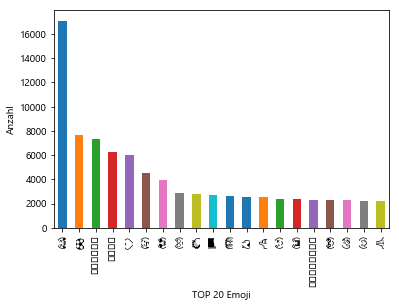

In [47]:
# vorkommen aller emoji
df_emoji_rows.extr_emojis.value_counts().head(20).plot.bar()
plt.xlabel('TOP 20 Emoji')
plt.ylabel('Anzahl')

plt.savefig('df_2_vorkommen_emoji_alle.png', bbox_inches='tight')

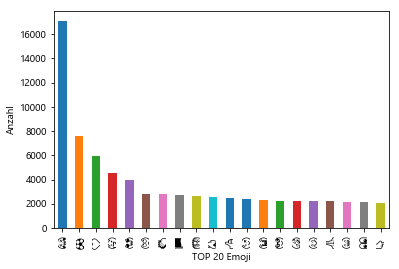

In [46]:
# vorkommen von nur einzelnen emoji
df_emoji_rows['extr_emojis'][df_emoji_rows['extr_emojis'].str.len() == 1].value_counts().head(20).plot.bar()
plt.xlabel('TOP 20 Emoji')
plt.ylabel('Anzahl')

plt.savefig('df_2_vorkommen_emoji_einzeln.png', bbox_inches='tight')

In [33]:
### unhide the strings in jupyter notebook
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)


#new_df.clean_text[new_df['clean_text']==997055707471003653]
type(df.iloc[15]['in_reply_to_user_id_str'])

numpy.float64

In [ ]:
Zipfsche Gesetz
y-Achse = relative Worthäufigkeit bzw. Emojihäufigkeit
x-Achse = Rang
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.zipf.html

In [19]:
# test: find a response to an initial tweet
df_initial_tweets = df_emoji_rows[df_emoji_rows['in_reply_to_user_id_str'].isnull()].copy() # tweets without reply_id
df_response_tweets = df_emoji_rows[~df_emoji_rows['in_reply_to_user_id_str'].isnull()].copy() # tweets with reply_id
df_response_tweets['in_reply_to_user_id_str'] = df_response_tweets['in_reply_to_user_id_str'].astype(np.int64).copy()

for id_str in df_initial_tweets['id_str']:
    for re_id in df_response_tweets['in_reply_to_user_id_str'].head(200):
        if id_str == re_id:
            print('id_str: ', id_str)
            print('re_id: ', re_id)
            print('found a match')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


id_str:  1013842967482847232
re_id:  1013842967482847232
found a match
id_str:  1013846031681900544
re_id:  1013846031681900544
found a match


In [9]:
# get initial and response emoji

df_emoji = df_emoji_rows.copy()
#df_emoji['in_reply_to_user_id_str'] = df_emoji['in_reply_to_user_id_str'].dropna().astype(np.int64)

df_initial_tweets = df_emoji[df_emoji['in_reply_to_user_id_str'].isnull()] # tweets without reply_id
df_response_tweets = df_emoji[~df_emoji['in_reply_to_user_id_str'].isnull()] # tweets with reply_id

# transform datatype in "in_reply_to_user_id_str" from numpy.float64 to np.int64
#df_emoji['in_reply_to_user_id_str'].dropna().astype(np.int64)
conversations = []
for reply_id in df_response_tweets['in_reply_to_user_id_str']:
    if (df_initial_tweets['id_str'] == reply_id).any():
        
        #print('intial: ', df_initial_tweets[df_initial_tweets['id_str']== reply_id]['extr_emojis'])
        initial = df_initial_tweets[df_initial_tweets['id_str']== reply_id]['extr_emojis']

        #print('response :', df_response_tweets[df_response_tweets['in_reply_to_user_id_str']== reply_id]['extr_emojis'])
        response = df_response_tweets[df_response_tweets['in_reply_to_user_id_str']== reply_id]['extr_emojis']

        
        tupl = (initial, response)
        conversations.append(tupl)
print('Done.')

Done.


In [10]:
df_wip = pd.DataFrame.from_records(conversations, columns=['initial', 'response'])
df_wip['initial']= df_wip['initial'].astype(str)
df_wip['response']= df_wip['response'].astype(str)

def extract_emojis(my_str):
    return ''.join(c for c in my_str if c in emoji.UNICODE_EMOJI)


df_extr_emojis_initial = df_wip['initial'].apply(lambda x: extract_emojis(x))
df_extr_emojis_response = df_wip['response'].apply(lambda x: extract_emojis(x))
df_conv = df_wip.assign(extr_emojis_initial = df_extr_emojis_initial, extr_emojis_response = df_extr_emojis_response)


In [45]:
df_conv.describe()

,initial,response,extr_emojis_initial,extr_emojis_response
count,1127,1127,1127,1127
unique,806,806,435,464
top,"842823 ⚽\nName: extr_emojis, dtype: object","843127 ⚽ \n843447 ✔ \n843566 ✔ \n843740 😍😎 \n843808 👻 \n844414 ⚽ \n844867 😊🤞♥\n845178 😊🤞♥\n848197 ▶ \n849447 ⚽ \n852305 ⚽ \n862232 🏆 \n876785 👉 \n880309 👉 \n899718 👉 \n908707 😊🤞♥\n998657 💯 \n1008917 👉 \nName: extr_emojis, dtype: object",⚽,😲
freq,18,18,79,54


In [11]:
# Top 20 single Emoji initial
series_emoji_single_top20_initial = df_conv['extr_emojis_initial'][df_conv['extr_emojis_initial'].str.len() == 1].value_counts().head(20)


df_emoji_single_top20_initial = series_emoji_single_top20_initial.to_frame()
df_emoji_single_top20_initial['emoji'] = df_emoji_single_top20_initial.index
df_emoji_single_top20_initial['Anzahl'] = df_emoji_single_top20_initial['extr_emojis_initial']
df_emoji_single_top20_initial.reset_index(inplace=True)
df_emoji_single_top20_initial = df_emoji_single_top20_initial.drop(columns = 'index')
df_emoji_single_top20_initial = df_emoji_single_top20_initial.drop(columns = 'extr_emojis_initial')
df_emoji_single_top20_initial['Prozent'] = df_emoji_single_top20_initial['Anzahl']/df_emoji_single_top20_initial['Anzahl'].sum() * 100
df_emoji_single_top20_initial_transpose = df_emoji_single_top20_initial.transpose()
df_emoji_single_top20_initial

,emoji,Anzahl,Prozent
0,⚽,79,25.320513
1,😂,34,10.897436
2,♣,20,6.410256
3,🙌,17,5.448718
4,😍,15,4.807692
5,🤔,15,4.807692
6,😏,14,4.487179
7,👀,13,4.166667
8,💪,12,3.846154
9,👏,11,3.525641


In [46]:
df_emoji_single_top20_initial['Anzahl'].sum()

312

In [12]:
# Top 20 single Emoji response
series_emoji_single_top20_response = df_conv['extr_emojis_response'][df_conv['extr_emojis_response'].str.len() == 1].value_counts().head(20)


df_emoji_single_top20_response = series_emoji_single_top20_response.to_frame()
df_emoji_single_top20_response['emoji'] = df_emoji_single_top20_response.index
df_emoji_single_top20_response['Anzahl'] = df_emoji_single_top20_response['extr_emojis_response']
df_emoji_single_top20_response.reset_index(inplace=True)
df_emoji_single_top20_response = df_emoji_single_top20_response.drop(columns = 'index')
df_emoji_single_top20_response = df_emoji_single_top20_response.drop(columns = 'extr_emojis_response')
df_emoji_single_top20_response['Prozent'] = df_emoji_single_top20_response['Anzahl']/df_emoji_single_top20_response['Anzahl'].sum() * 100
df_emoji_single_top20_response_transpose = df_emoji_single_top20_response.transpose()
df_emoji_single_top20_response


,emoji,Anzahl,Prozent
0,😲,54,22.131148
1,😂,43,17.622951
2,❤,20,8.196721
3,⚽,13,5.327869
4,👍,11,4.508197
5,🤔,10,4.098361
6,💜,9,3.688525
7,🙌,9,3.688525
8,💪,8,3.278689
9,📌,8,3.278689


In [13]:
# get emo initial and get top 3 response emoji
emo = '⚽'
df_conv2 = df_conv.drop(columns = ['initial', 'response'])
df_conv2_pat = df_conv2[df_conv2['extr_emojis_initial']==emo]
df_conv2_pat_single_emoji = df_conv2_pat[df_conv2_pat['extr_emojis_response'].str.len() == 1]
df_conv2_pat_single_emoji['extr_emojis_response'].value_counts().head(3)

⚽    5
😲    2
👏    2
Name: extr_emojis_response, dtype: int64

In [14]:
# get emo initial and get top 3 response emoji
emo = '😂'
df_conv2 = df_conv.drop(columns = ['initial', 'response'])
df_conv2_pat = df_conv2[df_conv2['extr_emojis_initial']==emo]
df_conv2_pat_single_emoji = df_conv2_pat[df_conv2_pat['extr_emojis_response'].str.len() == 1]
df_conv2_pat_single_emoji['extr_emojis_response'].value_counts().head(3)

😂    11
😲    5 
👍    2 
Name: extr_emojis_response, dtype: int64

In [15]:
# get emo initial and get top 3 response emoji
emo = '♣'
df_conv2 = df_conv.drop(columns = ['initial', 'response'])
df_conv2_pat = df_conv2[df_conv2['extr_emojis_initial']==emo]
df_conv2_pat_single_emoji = df_conv2_pat[df_conv2_pat['extr_emojis_response'].str.len() == 1]
df_conv2_pat_single_emoji['extr_emojis_response'].value_counts().head(3)

Series([], Name: extr_emojis_response, dtype: int64)

In [16]:
# get emo initial and get top 3 response emoji
emo = '🙌'
df_conv2 = df_conv.drop(columns = ['initial', 'response'])
df_conv2_pat = df_conv2[df_conv2['extr_emojis_initial']==emo]
df_conv2_pat_single_emoji = df_conv2_pat[df_conv2_pat['extr_emojis_response'].str.len() == 1]
df_conv2_pat_single_emoji['extr_emojis_response'].value_counts().head(3)

🙌    5
👏    1
❤    1
Name: extr_emojis_response, dtype: int64

In [47]:
# get emo initial and get top 3 response emoji
emo = '😍'
df_conv2 = df_conv.drop(columns = ['initial', 'response'])
df_conv2_pat = df_conv2[df_conv2['extr_emojis_initial']==emo]
df_conv2_pat_single_emoji = df_conv2_pat[df_conv2_pat['extr_emojis_response'].str.len() == 1]
df_conv2_pat_single_emoji['extr_emojis_response'].value_counts().head(3)

❤    2
😳    1
🤔    1
Name: extr_emojis_response, dtype: int64

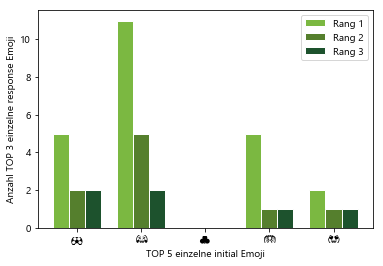

In [48]:
# changing matplotlib font

# Along with matplotlib.pyplot, for this one
# you also need to import matplotlib itself
import matplotlib

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Segoe UI Emoji"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

###############################

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [5, 11, 0, 5, 2] # first response emojis
bars2 = [2, 5, 0, 1, 1] # second response emojis
bars3 = [2, 2, 0, 1, 1] # third response emojis
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7BB841', width=barWidth, edgecolor='white', label='Rang 1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Rang 2')
plt.bar(r3, bars3, color='#1D522D', width=barWidth, edgecolor='white', label='Rang 3')
 
# Add xticks on the middle of the group bars
plt.xlabel('TOP 5 einzelne initial Emoji', fontweight='bold')
plt.ylabel('Anzahl TOP 3 einzelne response Emoji', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df_emoji_single_top20_initial['emoji'].head(5)) #['⚽', '😂', '♣', '🙌', '😍']

#
#plt.text(x,y,'emo')
# Create legend & Show graphic
plt.legend()
plt.savefig('df_twitter_top3_der_top5_single_emoji.pdf', bbox_inches='tight') # 
plt.show()



In [37]:
# POS Tagger "TweeboParser" 
# creating dataframe
"""
# save processed dataframe to file
df_emoji_rows['raw_text'].to_csv(r'twitter_stream_df_emoji_rows.txt', header=None, index=None, mode='a', sep=',')
"""

# desktop
df_pos = pd.read_csv('C:\\Users\\Wilm Hanke\\Documents\\GitHub\\MSc\\ark-tweet-nlp-0.3.2\\twitter_stream_POS_tagged_tweets.txt', sep='\t')
# mobile
#df_pos = pd.read_csv("C:\\Users\\Wilm\\Documents\\GitHub\\MSc\\ark-tweet-nlp-0.3.2\\twitter_stream_df_emoji_rows.txt", sep='\t')

       

In [38]:
df_pos.columns = ['raw_text', 'POS', 'likelihood', 'tweet_text_2']
df_pos = df_pos.drop(columns = 'tweet_text_2')
df_pos.head()       

,raw_text,POS,likelihood
0,"Did you hear about the hungry clock ? It went back four seconds . 😄 #Gemstars #Jokes #Smile 😄 "" 2018-07-02 16:23:15",", V O V P D A N , O V R $ N , E # # # E , $ $ ,","0,9844 0,9994 0,9990 0,9870 0,9940 0,9925 0,9776 0,9946 0,9984 0,9956 0,9981 0,8458 0,8140 0,9941 0,9977 0,9347 0,8925 0,9764 0,9626 0,9028 0,8637 0,9692 0,9918 0,9952"
1,"Now that's what you call a game .... action , suspense , drama & comedy ! 🇧🇷⚽🏆 #BRAMEX #WorldCup #soccer … https://t.co/16nhJna0Yz",", R L O O V D N , N , N , N & N , G # # # , U ,","0,9957 0,9883 0,9940 0,9766 0,9992 0,9978 0,9987 0,9974 0,9943 0,9843 0,9974 0,9929 0,9977 0,9889 0,9929 0,9765 0,9974 0,2603 0,8336 0,9911 0,9179 0,4804 0,9868 0,9817"
2,"Listening to the match , think it’s Brazil’s to loose ... maybe . It’d b class if #Firminho done a ‘ no look ’ lifting of the cup 😵🏆 #WorldCup2018",", V P D N , V L Z P V , R , L V N P ^ V D , ! V , V P D N G # ,","0,9904 0,9960 0,9977 0,9982 0,9885 0,9954 0,9886 0,9952 0,5994 0,9904 0,8583 0,9785 0,9512 0,9980 0,9948 0,9674 0,9525 0,9987 0,5767 0,9929 0,9815 0,9186 0,5326 0,6597 0,9558 0,9514 0,9950 0,9990 0,9844 0,2897 0,7063 0,9899"
3,Well done Brazil ! But Neymar be trippin ’ 😂😂😂 #neymar #brazil #fifaworldcup #footballmemes #southafricanblogger https://t.co/8M6BfQ5Ne8,"! V ^ , & ^ V V , ! ^ # # # # U","0,5353 0,8390 0,9834 0,9950 0,9930 0,9823 0,9905 0,9228 0,9637 0,8805 0,6472 0,3724 0,9711 0,9549 0,9664 0,9949"
4,The 2nd round curse still lives on . Goodbai México ❤ ️🇲🇽 #WorldCup,"D A N N R V P , ^ ^ E E #","0,9936 0,4725 0,9827 0,7378 0,9911 0,9685 0,6840 0,9956 0,4521 0,9943 0,6207 0,6770 0,9172"


In [142]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292110 entries, 0 to 292109
Data columns (total 3 columns):
raw_text      292110 non-null object
POS           292110 non-null object
likelihood    292110 non-null object
dtypes: object(3)
memory usage: 6.7+ MB


In [39]:
df_pos_emo_end = df_pos[df_pos['POS'].str.endswith('E',na = False)]
df_pos_emo_end.head()

,raw_text,POS,likelihood
6122,Two AMAZING and important saves by the Japan keeper . 🙊👏 #BELJPN #WorldCup xx,"$ A & A V P D ^ N , G # # E","0,9511 0,9842 0,9967 0,9628 0,8740 0,9990 0,9962 0,9997 0,9854 0,9976 0,2836 0,9072 0,9832 0,7512"
7373,@QuinnB112 Well what a game that was ! That's why we ❤ ️ the #WorldCup x,"@ ! O D N P V , L R O E E D ^ E","0,9988 0,9813 0,9693 0,9957 0,9979 0,7547 0,9918 0,9987 0,9941 0,9795 0,9981 0,4239 0,2641 0,9825 0,6220 0,4028"
9108,@Nigelrefowens Well said . Post of the day . 👍 #WorldCup2018 x,"@ ! V , N P D N , E # E","0,9989 0,8457 0,9340 0,9961 0,9025 0,9983 0,9996 0,9992 0,9984 0,9257 0,8513 0,3946"
23978,What's happen to de England Chant songs like 3 lions or Vindaloo ? Where's de songs ? 💁 #WorldCup #englandsongs XoOo,"L V P V ^ N N P $ N & N , L D N , E # # E","0,9930 0,9987 0,9840 0,2953 0,9795 0,7047 0,9888 0,9296 0,9798 0,9680 0,9906 0,7209 0,9984 0,8442 0,5604 0,9984 0,9978 0,9189 0,9082 0,9838 0,7602"
23984,#Sweden beats #Switzerland to earn quarter-final place ! 🇸🇪⚽️🇨🇭 #SWESUI #Russia2018 #WorldCup #TBW x,"# V ^ P V N N , G # # # # E","0,5719 0,8896 0,5768 0,9954 0,9986 0,9191 0,9892 0,9986 0,2603 0,6287 0,9822 0,9850 0,9720 0,3966"


In [144]:
df_pos_emo_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 6122 to 291107
Data columns (total 3 columns):
raw_text      89 non-null object
POS           89 non-null object
likelihood    89 non-null object
dtypes: object(3)
memory usage: 2.8+ KB


In [40]:
# finding the last word category befor emoji 

def last_word_category(my_string):
    s = list(my_string.replace(" ",""))
    categories = []
    index = 0
    
    while index != len(s):
    #print(s[index])
        if s[index] == 'E':
            category = s[index-1]
            categories.append(category)
        index += 1
    return ' '.join(categories)

df_last_word_category = df_pos_emo_end['POS'].apply(lambda x: last_word_category(x))

In [41]:
df_pos_emo_end = df_pos_emo_end.assign(last_word_category = df_last_word_category)

df_pos_emo_end.head()

,raw_text,POS,likelihood,last_word_category
6122,Two AMAZING and important saves by the Japan keeper . 🙊👏 #BELJPN #WorldCup xx,"$ A & A V P D ^ N , G # # E","0,9511 0,9842 0,9967 0,9628 0,8740 0,9990 0,9962 0,9997 0,9854 0,9976 0,2836 0,9072 0,9832 0,7512",#
7373,@QuinnB112 Well what a game that was ! That's why we ❤ ️ the #WorldCup x,"@ ! O D N P V , L R O E E D ^ E","0,9988 0,9813 0,9693 0,9957 0,9979 0,7547 0,9918 0,9987 0,9941 0,9795 0,9981 0,4239 0,2641 0,9825 0,6220 0,4028",O E ^
9108,@Nigelrefowens Well said . Post of the day . 👍 #WorldCup2018 x,"@ ! V , N P D N , E # E","0,9989 0,8457 0,9340 0,9961 0,9025 0,9983 0,9996 0,9992 0,9984 0,9257 0,8513 0,3946",", #"
23978,What's happen to de England Chant songs like 3 lions or Vindaloo ? Where's de songs ? 💁 #WorldCup #englandsongs XoOo,"L V P V ^ N N P $ N & N , L D N , E # # E","0,9930 0,9987 0,9840 0,2953 0,9795 0,7047 0,9888 0,9296 0,9798 0,9680 0,9906 0,7209 0,9984 0,8442 0,5604 0,9984 0,9978 0,9189 0,9082 0,9838 0,7602",", #"
23984,#Sweden beats #Switzerland to earn quarter-final place ! 🇸🇪⚽️🇨🇭 #SWESUI #Russia2018 #WorldCup #TBW x,"# V ^ P V N N , G # # # # E","0,5719 0,8896 0,5768 0,9954 0,9986 0,9191 0,9892 0,9986 0,2603 0,6287 0,9822 0,9850 0,9720 0,3966",#


In [42]:
# last word category to emoji

df_pos_emo_end = df_pos_emo_end[df_pos_emo_end.last_word_category.str.len() == 1]
df_pos_emo_end.last_word_category.value_counts().head(20)

#    21
G    4 
,    4 
^    3 
@    1 
Name: last_word_category, dtype: int64

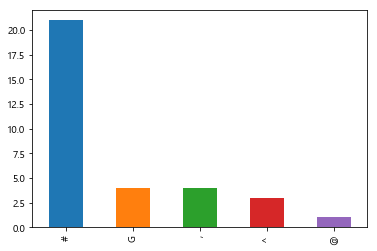

In [43]:
df_pos_emo_end.last_word_category.value_counts().head(10).plot.bar()

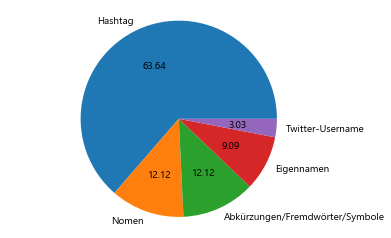

In [44]:
# pie chart percentag of word categories

labels = 'Hashtag', 'Nomen', 'Abkürzungen/Fremdwörter/Symbole', 'Eigennamen', 'Twitter-Username'
fracs = [21, 4, 4, 3, 1]
plt.pie(fracs, labels = labels, autopct='%.2f')
plt.axis('equal') 
plt.savefig('df_twitter_stream_last_word_category.pdf', bbox_inches='tight')